In [24]:
#you are transfering the information form q0 to q2 in this 
from qiskit import *
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#sets up the circuit
circuit = QuantumCircuit(3,3)

# optional, we want to transfer state 1 in this example
circuit.x(0)

#just a barrier
circuit.barrier()

#the superdense coding setup Hadamard on q1, CNOT on q1 to q2
circuit.h(1)
circuit.cx(1,2)

#just a barrier
circuit.barrier()

circuit.draw()

┌───┐ ░            ░ 
q_0: ┤ X ├─░────────────░─
     └───┘ ░ ┌───┐      ░ 
q_1: ──────░─┤ H ├──■───░─
           ░ └───┘┌─┴─┐ ░ 
q_2: ──────░──────┤ X ├─░─
           ░      └───┘ ░ 
c: 3/═════════════════════

In [6]:
#you have to run matplotlib inline before other .draw() works
# you also need pip install pylatexenc
%matplotlib inline

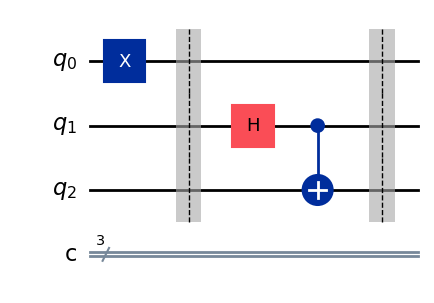

In [8]:
circuit.draw(output='mpl')

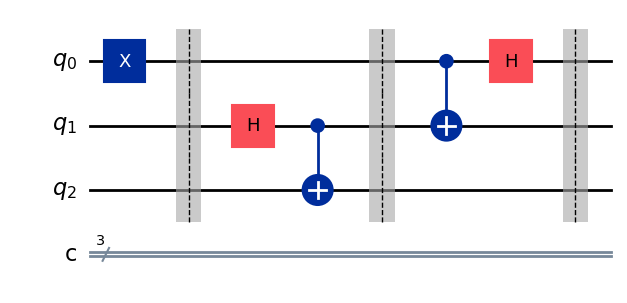

In [10]:
#every time you run on notebook, each initialization will run
#use circuit.data.pop() to remove the latest gate like an list

#adds CNOT to q0 to q1, Hadamard to q0
circuit.cx(0,1)
circuit.h(0)

circuit.barrier()
circuit.draw(output='mpl')

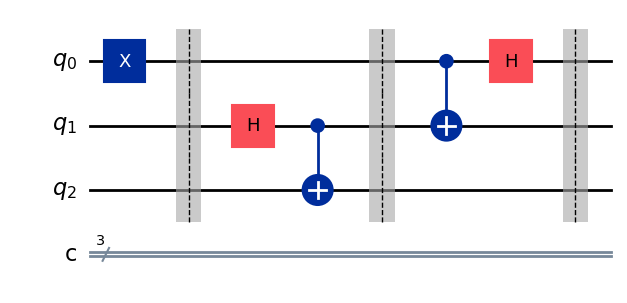

In [14]:
#this one is just to remove gates easier
#circuit.data.pop()

circuit.barrier()
circuit.draw(output='mpl')

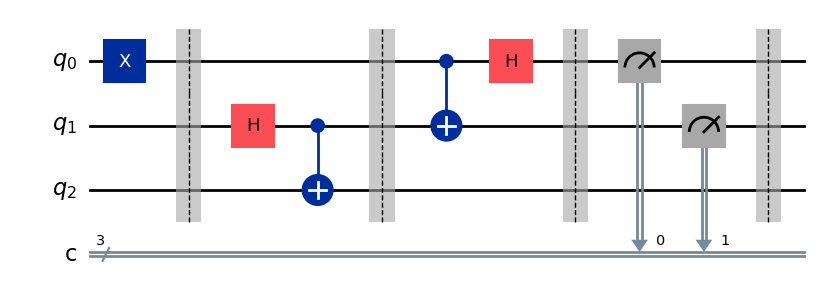

In [16]:
#adding the measurement gate to measure q0 and q1
circuit.measure([0,1],[0,1])
circuit.barrier()

circuit.draw(output='mpl')

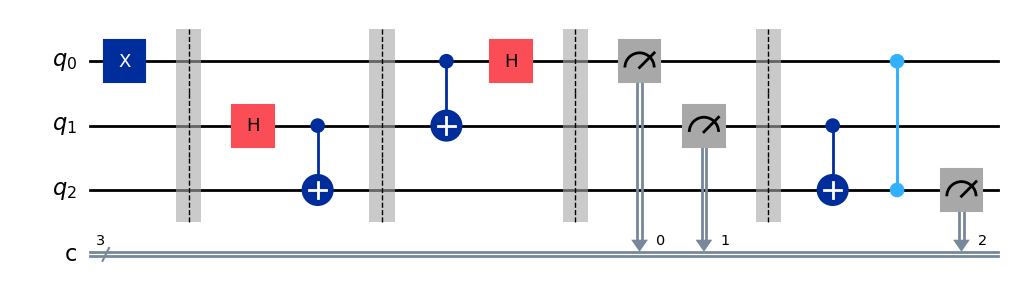

In [18]:
#CNOT on q1 and q2
circuit.cx(1,2)
#controlled Z gate on q0 to q2
circuit.cz(0,2)

circuit.measure([2],[2])
circuit.draw(output='mpl')

In [30]:
#simulating this circuit
#https://docs.quantum.ibm.com/guides/visualize-results
#simulator = Sampler().run('qasm_simulator')
#result = execute(circuit, backend=simulator, shots=1024).result()
#from qiskit.visualization import plot_histogram
#plot_histogram(result.get_counts(circuit))

quasi_dists = Sampler().run(circuit, shots=1024).result().quasi_dists[0]
print(quasi_dists)

{7: 0.240234375, 6: 0.251953125, 5: 0.2587890625, 4: 0.2490234375}


In [38]:
plot_histogram(quasi_dists.get_counts(circuit))

AttributeError: 'QuasiDistribution' object has no attribute 'get_counts'

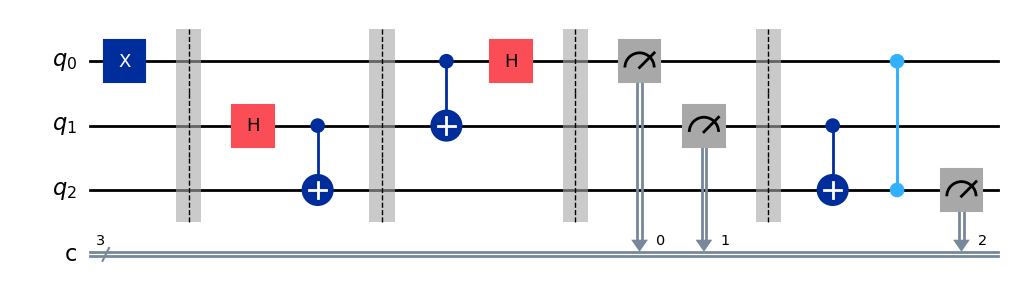

In [34]:
circuit.draw(output='mpl')

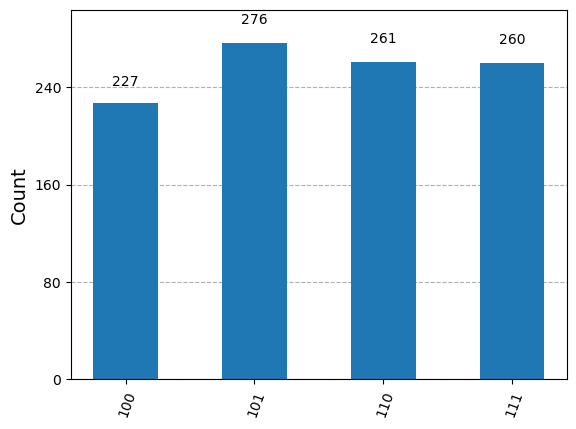

In [64]:
from qiskit_aer import AerSimulator
#https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html
#This is stupid, they changed it again
simulator = AerSimulator()
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
#execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(counts)